In [1]:
import numpy as np
import tangos as db
import pickle as pck
import pynbody
import matplotlib.pyplot as plt
import scipy.integrate as integ
import math as ma
plt.ion()

plt.rcParams['figure.figsize'] = (12, 9) 
plt.rcParams['font.size'] = 20  
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['xtick.major.size'] = 10 
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

sim = db.get_simulation('h1.cosmo50')

In [6]:
((13.8-0.33)/72)*3


0.56125

In [7]:
sim.timesteps


[<TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000096' z=12.88 t=0.33 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000138' z=9.97 t=0.48 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000187' z=8.00 t=0.64 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000192' z=7.84 t=0.66 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000224' z=6.99 t=0.77 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000274' z=6.00 t=0.93 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000288' z=5.77 t=0.98 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000346' z=5.00 t=1.18 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000384' z=4.60 t=1.30 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000456' z=3.99 t=1.55 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000480' z=3.83 t=1.63 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000576' z=3.27 t=1.95 Gyr>,
 <TimeStep 'h1.cosmo50/h1.cosmo50PLK.15

In [2]:
def host_density(halo_num,bh_index,R_min=0.7,R_max=1.75,plot:bool=False):
    
    halo= db.get_halo('h1.cosmo50/%4096/'+str(halo_num))
    bh = halo['BH_central'][bh_index]
    mass = bh['BH_mass']
    bhid = bh.halo_number
    dist = bh['BH_central_distance']
        
    #shrink_h1,time_h1,max_radius = halo.calculate_for_progenitors('shrink_center','t()','max_radius')
    hostid,host_path,time,center_dist = bh.calculate_for_progenitors('host_halo.halo_number()','host_halo.path()','t()','BH_central_distance')
    
    if all(i>1 for i in center_dist):
        print('ERROR: This BH was never central')
        return 0,0,0,0,0,0,0,0,0,0
    
    if all(i==halo_num for i in hostid):
        print('ERROR: This BH never left the input halo')
        return 0,0,0,0,0,0,0,0,0,0
    
    index = np.where(hostid!=halo_num)[0][0]

    if center_dist[index]>1:
        
        for i in range(len(hostid)):
            
            if (hostid[i]!=halo_num) & (center_dist[i]<1):
                index = i
                break
            else:
                pass
    
    original_halo = db.get_halo(host_path[index])
    
    shrink = original_halo['shrink_center']
    #print(shrink)
    dist1 = np.sqrt(((shrink[0])**2)+((shrink[1])**2)+((shrink[2])**2))
    #print(dist)

    z = host_path[index].split('.')[-1][0:6]
    #print(z)
    halo2 = db.get_halo('h1.cosmo50/%'+str(z)+'/1')
    shrink2 = halo2['shrink_center']
    #print(shrink2)
    dist2 = np.sqrt(((shrink2[0])**2)+((shrink2[1])**2)+((shrink2[2])**2))
    #print(dist2)
    radius = halo2['max_radius']
    difference = np.abs(dist2-dist1)
    #print(difference)
    #print(host_path[index])
    if difference < radius:
    
        #print('First original inside h1')
    
        inside=-1
        outside:bool = False
    
        while outside==False:
        
            #print(outside)
            index+=1
            if index >= len(hostid):
                print('ERROR the BH never met the three conditions')
                return 0,0,0,0,0,0,0,0,0,0

            if (hostid[index]!=halo_num) & (center_dist[index]<1):
                
                original_halo = db.get_halo(host_path[index])
            
                #print(original_halo)
            
                shrink = original_halo['shrink_center']
            
                #print(shrink)
            
                dist1 = np.sqrt(((shrink[0])**2)+((shrink[1])**2)+((shrink[2])**2))
            
                #print('original halo:',dist)
            
                z = host_path[index].split('.')[-1][0:6]
                halo2 = db.get_halo('h1.cosmo50/%'+str(z)+'/1')
                shrink2=halo2['shrink_center']
                dist2= np.sqrt(((shrink2[0])**2)+((shrink2[1])**2)+((shrink2[2])**2))
                #print(shrink2)
                #print('halo1:',dist2)
            
                diff = abs(dist2-dist1)
                radius = halo2['max_radius']
                #print('rad:',radius)
                #print('diff:',diff)
            
                if diff>=radius:
                    #print('yes')
                    outside = True
                
                                   
    else:   
        inside = 0

    stepp = original_halo.timestep
    step = time[index]
    full_mass = original_halo['Mstar']
    
    if step < 0.65:
        print('ERROR: no original host')
        return 0,0,0,0,0,0,0,0,0,0
              
    if full_mass>10000000:
        res=0
    else:
        res=-1
        print('ERROR: host galaxy not resolved')
        return 0,0,0,0,0,0,0,0,0,0
    
    if 'star_density_profile' in original_halo:
        print('Original BH Host:',original_halo.halo_number)
        print('BH id:',bhid)
        print('Time in simulation:',step,'Gyr') 
    else:
        print('ERROR: The original host has no density profile')
        return  0,0,0,0,0,0,0,0,0,0
    
    rbins = np.arange(len(original_halo['star_density_profile']))*0.1+0.5
    density = original_halo['star_density_profile']
    ok = np.where(density>0) 
    start_cut_off = (R_min*10)-5
    end_cut_off=(R_max*10)-4
    rounded = round(R_max,1)
    
    if rounded!=R_max:
        end_cut_off+=1   
        
    if len(density[ok])==0:
        print('ERROR: Star density within '+str(R_min)+'kpc is zero')
        return 0,0,0,0,0,0,0,0,0,0
    
    if 'star_mass_profile' in original_halo:
        original_mass = original_halo.calculate('at('+str(R_min)+',star_mass_profile)')
        if original_mass ==0:
            original_mass=1
    else:
        original_mass = 1  
    
    check = np.array_equal(density,density[ok])
    zero=0   
    
    if check==False:
        #print('ERROR: Zero density values detected - erased from plot')
        zero=-1
       
    plotbins = rbins[ok][0:int(end_cut_off)]
    plot_density = density[ok][0:int(end_cut_off)]

    steps = rbins[ok][int(start_cut_off):int(end_cut_off)]
    
    if len(steps) == 0:
        print('ERROR: Not enough density points to evaluate')
        return 0,0,0,0,0,0,0,0,0,0
    
    y = np.log(plot_density[int(start_cut_off):int(end_cut_off)])
    x = np.log(steps)

    constants = np.polyfit(x,y,1)
    a = np.exp(constants[1])
    b = -constants[0]
   
    #print('Parameters:',a,b) 

    steps2 = np.arange(0,R_min,0.1)
    new_steps = np.append(steps2,steps)

    plotbins2 = np.arange(0,0.5,0.1)
    new_plotbins = np.append(plotbins2,plotbins)

    def function(x):
        y = []
        y = a*x**(-b)
        return y

    y = function(new_plotbins)

    if plot==True:
        plt.plot(plotbins,plot_density,ls='-',c='deeppink',lw=4)
        plt.yscale('log')
        plt.ylabel(r'Star Density [M$_{\odot}$/kpc$^3$]')
        plt.xlabel(r'R [kpc]')
        plt.title('Star Density of Host at 0-'+str(R_max)+'kpc')
        plt.axvline(x=center_dist[index], label='BH Location',c='darkblue',lw=2,ls='--')
        plt.axvline(x=0.7,label='Resolution Limit',c='deepskyblue',lw=2,ls='--')
        plt.legend(loc='upper right')
        
        plt.plot(new_plotbins,y,c='pink',ls='-.',label='Extrapolated Star Desnity',lw=3)
        plt.yscale('log')
        plt.legend(loc='upper right')
    
    return plotbins,plot_density,center_dist[index],new_plotbins



Original BH Host: 10
BH id: 568954394
Time in simulation: 1.627593993470575 Gyr


/tmp/ipykernel_1048902/3265273426.py:176: RuntimeWarning: divide by zero encountered in power
  y = a*x**(-b)
/tmp/ipykernel_1048902/1399449345.py:2: RuntimeWarning: divide by zero encountered in divide
  density = norm/(((r/rs)**a)*((1+r/rs)**(b-a)))
/tmp/ipykernel_1048902/1399449345.py:25: RuntimeWarning: divide by zero encountered in power
  plt.plot(x,a[3]*x**(-b[3]),label='Power Law',c='mediumvioletred')


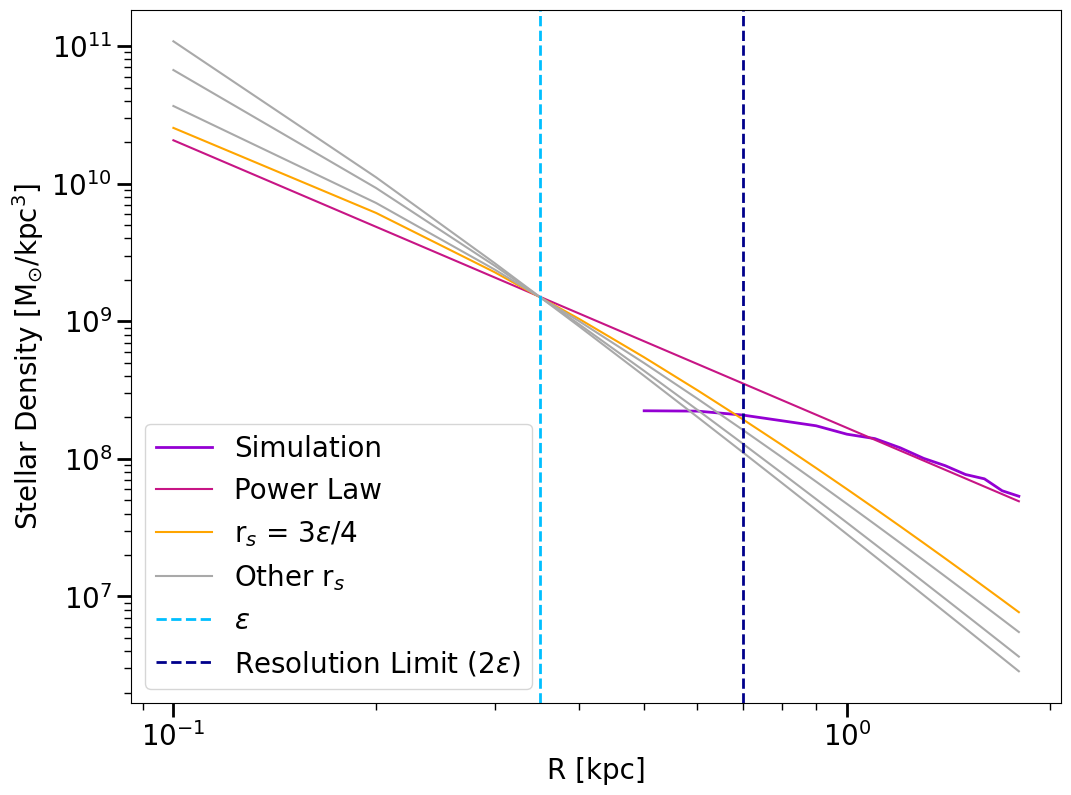

In [26]:
def check(r,rs,norm,a=1,b=4):
    density = norm/(((r/rs)**a)*((1+r/rs)**(b-a)))
    return density
f = open('UCDs_powerlaw.pkl','rb')
data = pck.load(f)
f.close()
plotbins,plot_density,center_dist,x = host_density(1,3)

a = np.array(data['a'])
b = np.array(data['b'])
z = 0.35
rho = normalise(a[3],b[3],rs=z)
rho1 = normalise(a[3],b[3],rs=z*0.5)
rho2 = normalise(a[3],b[3],rs=z*0.25)
rho3 = normalise(a[3],b[3],rs=z*0.125)
rho4 = normalise(a[3],b[3],rs=z*2)
rho5 = normalise(a[3],b[3],rs=z*0.75)
y = check(x,z,rho)
y1 = check(x,0.5*z,rho1)
y2 = check(x,0.25*z,rho2)
y3 = check(x,0.125*z,rho3)
y4 = check(x,2*z,rho4)
y5 = check(x,0.75*z,rho5)
plt.plot(plotbins,plot_density,ls='-',c='darkviolet',lw=2,label='Simulation')
plt.plot(x,a[3]*x**(-b[3]),label='Power Law',c='mediumvioletred')
plt.plot(x,y5,label='r$_s$ = $3\epsilon/4$',c='orange')
#plt.plot(x,y,label='Other r$_s$',c='darkgray')
plt.plot(x,y1,label='Other r$_s$',c='darkgray')
plt.plot(x,y2,c='darkgray')
plt.plot(x,y3,c='darkgray')
#plt.plot(x,y4,c='darkgray')
plt.axvline(x=z,label='$\epsilon$',c='deepskyblue',lw=2,ls='--')
plt.axvline(x=0.7,label='Resolution Limit ($2\epsilon$)',c='darkblue',lw=2,ls='--')
#plt.axvline(x=center_dist, label='BH Location',c='darkblue',lw=2,ls='--')
plt.yscale('log')
plt.ylabel(r'Stellar Density [M$_{\odot}$/kpc$^3$]')
plt.xlabel(r'R [kpc]')
plt.xscale('log')
#plt.plot([1,1],[y[0],y[-1]],'k--')
plt.legend()
plt.savefig('Desnity_functions.png')

In [5]:
def normalise(a,b,rs=0.35,r= 0.35,beta=4,alpha=1):
    def function(x):
        y = []
        y = a*x**(-b)
        return y
    density = function(r)
    function1 = (((r/rs)**(alpha))*((1+r/rs)**(beta-alpha)))
    rho_o = density*function1
    return rho_o

#log space second graph, big graph separate and put line at 10^-1 to say looks its belowe this 


In [11]:
def tidal_history(a,b,bhid,BH_index,step,original_halo,halo_num=1,beta=4,alpha=1,rs=0.35):
    
    C = normalise(a,b,beta=beta,alpha=alpha)
    short_step = int(step.split('.')[-1])
    original_halo_num = int(original_halo.split('_')[-1])
    short_step = str(short_step)
    if len(short_step)!=4:
        short_step = str(0)+str(short_step)
        if len(short_step)!=3:
            short_step = str(0)+str(short_step)
        
    halo= db.get_halo('h1.cosmo50/%'+str(short_step)+'/'+str(halo_num))
    host= db.get_halo('h1.cosmo50/%'+str(short_step)+'/'+str(original_halo_num))
    bh = db.get_halo('h1.cosmo50/%'+str(short_step)+'/BH_'+str(bhid))

    mass_hist,radius_hist = halo.calculate_for_descendants('at(radius(200),star_mass_profile)','max_radius')
    host_num_hist,dist,time,bh_mass= bh.calculate_for_descendants('host_halo.halo_number()','BH_central_distance','t()','BH_mass')
    #host_mass = host.calculate('at(1.4,star_mass_profile)')

    indexx = np.where(host_num_hist==halo_num)[0][0]
    host_num_hist = host_num_hist[indexx:]
    
    for i in range(len(host_num_hist)):
        if all(i==halo_num for i in host_num_hist):
            index = indexx
            break
        else:
            indexx = np.where(host_num_hist!=halo_num)[0][0]
            host_num_hist = host_num_hist[indexx+1:]
            
    
    dist = dist[index:]
    mass_hist = mass_hist[index:]
    radius_hist = radius_hist[index:]
    time = time[index:]
    host_num_hist = host_num_hist[index:]
    bh_mass = bh_mass[index:]
    infall = time[0]
    
    # if all(i==halo_num for i in host_num_hist):
    #     print('Correct ')
    # else: 
    #     print('Error')
    #     return 0,0,0
    
    rj=[]
    m=[]
        
    for i in range(len(dist)):
        if i == 0:
            
            M = mass_hist[i]
            R = dist[i]
            rj.append(1.4)
            m.append(C*4*np.pi*(((rs**3)*(rj[i]**2))/(2*((rj[i]**2)+(2*rs*rj[i])+(rs**2)))))            
            
        else: 
           
            if rj[i]<=(min(rj)):
                m.append(C*4*np.pi*(((rs**3)*(rj[i]**2))/(2*((rj[i]**2)+(2*rs*rj[i])+(rs**2)))))
                
            else:
                
                m.append(m[i-1])
                
        M = mass_hist[i]
        R = dist[i]    
        rj.append((((m[i]/M)/(3+m[i]/M))**(1/3))*R)
        
       
    return(rj,time,m,bh_mass,infall)

In [12]:
def original_host_mass_at(radius,ori_host,step):
    short_step = int(step.split('.')[-1])
    original_halo_num = int(ori_host.split('_')[-1])
    short_step = str(short_step)
    if len(short_step)!=4:
        short_step = str(0)+str(short_step)
        if len(short_step)!=3:
            short_step = str(0)+str(short_step)
        
    host= db.get_halo('h1.cosmo50/%'+str(short_step)+'/'+str(original_halo_num))
    host_at = host.calculate('at('+str(radius)+',star_mass_profile)')
    return host_at

In [24]:
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()

ids=np.array(data['bhid'])
#i = np.where(ids==569684299)
#i = int(i[0])
index=data['index']
a=data['a']
b=data['b']
step=data['step']
host=data['host']

rj=[]
t=[]
m=[]
infal=[]
bh_m=[]

x = 0.35
rs = [x*0.125,x*0.25,x*0.5,x*0.75,x,x*2,x*3]

for i in range(len(index[0:5])):
    r_j,time,mass,bh_mass,infall = tidal_history(a[i],b[i],ids[i],index[i],step[i],host[i],rs=rs[5])
    rj.append(r_j)
    t.append(time)
    m.append(mass)
    infal.append(infall)
    bh_m.append(bh_mass)
    
data_to_file={'rj':rj,'time':t,'mass':m,'bh_mass':bh_m,'infall':infal}
f = open('test.pkl','wb')
pck.dump(data_to_file,f)
f.close()


In [25]:
f = open('test.pkl','rb')
data = pck.load(f)
f.close()

time = data['time']
mass = data['mass']
bh_mass=data['bh_mass']
infall = np.array(data['infall'])

f = open('Extrapolation_Outputs.pkl','rb')
old_data = pck.load(f)
f.close()

ids = np.array(old_data['bhid'])
dist = np.array(old_data['dist'])
host_mass = np.array(old_data['hostmass'])
index=np.array(old_data['index'])
a=np.array(old_data['a'])
b=np.array(old_data['b'])
step=np.array(old_data['step'])
host=np.array(old_data['host'])

f = open('UCD_proxy.pkl','rb')
vold_data = pck.load(f)
f.close()

UCD_proxy = np.array(vold_data['mass'])

UCD_index = []
UCD_bh_mass = []
UCD_mass=[]
other_index=[]

for i in range(len(time)):
    if mass[i][-1]>1000000:
        other_index.append(index[i]) 
        UCD_index.append(i)
print(len(mass))
print(len(UCD_index))
for i in range(len(other_index)):
    UCD_mass.append(mass[UCD_index[i]][-1])
    UCD_bh_mass.append(bh_mass[UCD_index[i]][-1])
    
UCD_host_mass = host_mass[UCD_index]
UCD_dist = dist[UCD_index]
infall = infall[UCD_index]
UCD_proxy = UCD_proxy[UCD_index]
UCD_ids = ids[UCD_index]
UCD_a = a[UCD_index]
UCD_b = b[UCD_index]
UCD_step = step[UCD_index]
UCD_host = host[UCD_index]


#data_to_file={'rj':UCD_rj,'a':UCD_a,'b':UCD_b,'step':UCD_step,'host':UCD_host,'ids':UCD_ids,'index':other_index,'bh_mass':UCD_bh_mass,'mass':UCD_mass,'host_mass':UCD_host_mass,'dist':UCD_dist,'infall':infall,'proxy':UCD_proxy}
#f = open('rs_check_bad.pkl','wb')
#pck.dump(data_to_file,f)
#f.close()

5
1


In [ ]:
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()

ids=np.array(data['bhid'])
i = np.where(ids==569163168)
i = int(i[0])
index=data['index']
a=data['a']
b=data['b']
step=data['step']
host=data['host']

rj=[]
t=[]
m=[]
infal=[]
bh_m=[]

x = 0.35
rs = [x*0.125,x*0.25,x*0.5,x*0.75,x,x*2,x*3]

for j in range(len(rs)):
    r_j,time,mass,bh_mass,infall = tidal_history(a[i],b[i],569684299,index[i],step[i],host[i],rs = rs[j])
    rj.append(r_j)
    t.append(time)
    m.append(mass)
    infal.append(infall)
    bh_m.append(bh_mass)
    
data_to_file={'rj':rj,'time':t,'mass':m,'bh_mass':bh_m,'infall':infal}
f = open('rs_test_good.pkl','wb')
pck.dump(data_to_file,f)
f.close()


In [23]:
f = open('rs_test_good.pkl','rb')
data = pck.load(f)
f.close()

time = data['time']
mass = data['mass']
bh_mass=data['bh_mass']
infall = np.array(data['infall'])
rj = np.array(data['rj'])

f = open('Extrapolation_Outputs.pkl','rb')
old_data = pck.load(f)
f.close()

ids = np.array(old_data['bhid'])
dist = np.array(old_data['dist'])
host_mass = np.array(old_data['hostmass'])
index=np.array(old_data['index'])
a=np.array(old_data['a'])
b=np.array(old_data['b'])
step=np.array(old_data['step'])
host=np.array(old_data['host'])

f = open('UCD_proxy.pkl','rb')
vold_data = pck.load(f)
f.close()

UCD_proxy = np.array(vold_data['mass'])

UCD_index = []
UCD_bh_mass = []
UCD_mass=[]
UCD_rj = []
other_index=[]

for i in range(len(time)):
    if mass[i][-1]>10000:
        other_index.append(index[i]) 
        UCD_index.append(i)
print(len(mass))
print(len(UCD_index))
for i in range(len(other_index)):
    UCD_mass.append(mass[UCD_index[i]][-1])
    UCD_bh_mass.append(bh_mass[UCD_index[i]][-1])
    UCD_rj.append(rj[UCD_index[i]][-1])
    
UCD_host_mass = host_mass[UCD_index]
UCD_dist = dist[UCD_index]
infall = infall[UCD_index]
UCD_proxy = UCD_proxy[UCD_index]
UCD_ids = ids[UCD_index]
UCD_a = a[UCD_index]
UCD_b = b[UCD_index]
UCD_step = step[UCD_index]
UCD_host = host[UCD_index]


data_to_file={'rj':UCD_rj,'a':UCD_a,'b':UCD_b,'step':UCD_step,'host':UCD_host,'ids':UCD_ids,'index':other_index,'bh_mass':UCD_bh_mass,'mass':UCD_mass,'host_mass':UCD_host_mass,'dist':UCD_dist,'infall':infall,'proxy':UCD_proxy}
f = open('rs_check_good.pkl','wb')
pck.dump(data_to_file,f)
f.close()

7
7


In [102]:
f = open('Hernquist_Disruption_Outputs.pkl','rb')
data = pck.load(f)
f.close()

time = data['time']
mass = data['mass']
bh_mass=data['bh_mass']
infall = np.array(data['infall'])
rj = data['rj']

f = open('Extrapolation_Outputs.pkl','rb')
old_data = pck.load(f)
f.close()

ids = np.array(old_data['bhid'])
dist = np.array(old_data['dist'])
host_mass = np.array(old_data['hostmass'])
index=np.array(old_data['index'])
a=np.array(old_data['a'])
b=np.array(old_data['b'])
step=np.array(old_data['step'])
host=np.array(old_data['host'])

f = open('UCD_proxy.pkl','rb')
vold_data = pck.load(f)
f.close()

UCD_proxy = np.array(vold_data['mass'])

UCD_index = []
UCD_bh_mass = []
UCD_mass=[]
UCD_rj = []
other_index=[]

for i in range(len(time)):
    if mass[i][-1]>100000:
        other_index.append(index[i]) 
        UCD_index.append(i)
print(len(mass))
print(len(UCD_index))
for i in range(len(other_index)):
    UCD_mass.append(mass[UCD_index[i]][-1])
    UCD_bh_mass.append(bh_mass[UCD_index[i]][-1])
    UCD_rj.append(rj[UCD_index[i]][-1])
    
UCD_host_mass = host_mass[UCD_index]
UCD_dist = dist[UCD_index]
infall = infall[UCD_index]
UCD_proxy = UCD_proxy[UCD_index]
UCD_ids = ids[UCD_index]
UCD_a = a[UCD_index]
UCD_b = b[UCD_index]
UCD_step = step[UCD_index]
UCD_host = host[UCD_index]


data_to_file={'rj':UCD_rj,'a':UCD_a,'b':UCD_b,'step':UCD_step,'host':UCD_host,'ids':UCD_ids,'index':other_index,'bh_mass':UCD_bh_mass,'mass':UCD_mass,'host_mass':UCD_host_mass,'dist':UCD_dist,'infall':infall,'proxy':UCD_proxy}
f = open('UCD_Hernquist.pkl','wb')
pck.dump(data_to_file,f)
f.close()

424
301


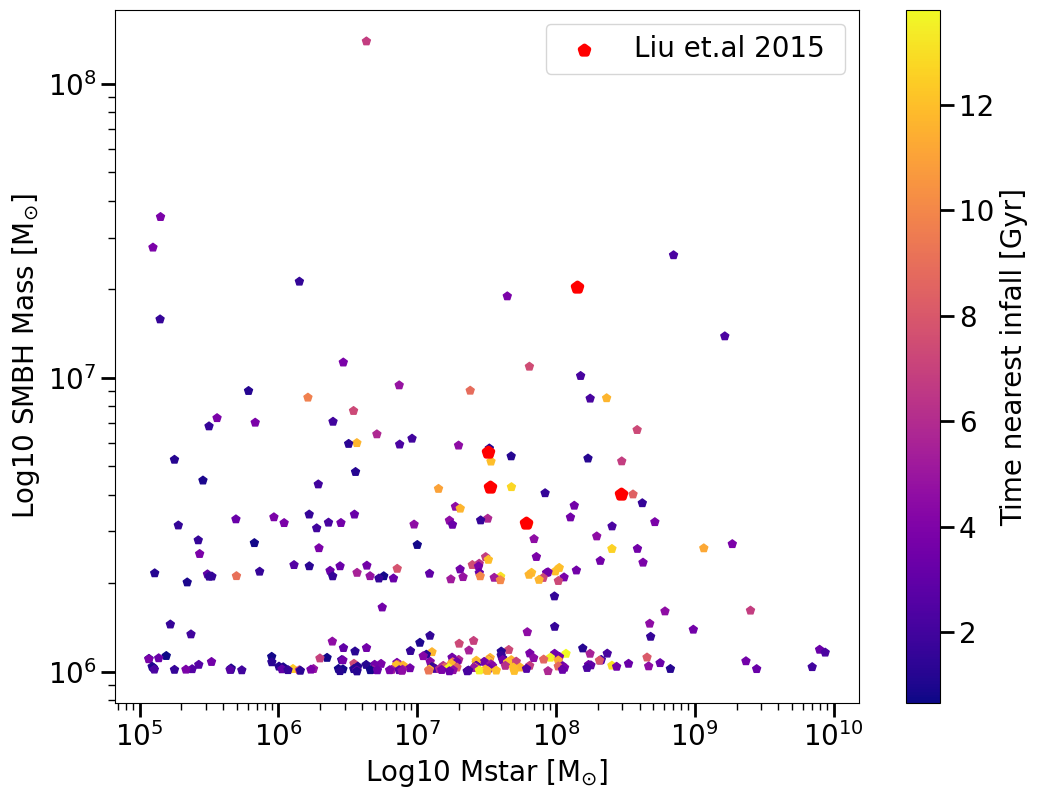

In [172]:
f = open('UCD_Hernquist.pkl','rb')
data = pck.load(f)
f.close()

UCD_bh_mass = np.array(data['bh_mass'])
UCD_mass=np.array(data['mass'])
UCD_infall = np.array(data['infall'])
UCD_host = np.array(data['host_mass'])
UCD_id = np.array(data['ids'])

bad = np.where(UCD_mass<10000000000)
#plt.scatter(UCD_mass,UCD_bh_mass,c = (UCD_infall),cmap = 'plasma',marker='o')
#plt.scatter(UCD_proxy,UCD_bh_mass,c = (UCD_infall),cmap = 'binary',marker='p')
plt.scatter(UCD_mass[bad],UCD_bh_mass[bad],c = (UCD_infall[bad]),cmap = 'plasma',marker='p')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='Time nearest infall [Gyr]')
plt.ylabel('Log10 SMBH Mass [M$_{\odot}$]')
plt.xlabel('Log10 Mstar [M$_{\odot}$]')
x = [142771855.50051567, 292886385.26811767, 60638233.54077626,32337005.82649589, 33618003.856203355]#, 19982490.252430223]
y = [20344817.370523263, 4038716.314133705, 3200198.552519341, 5572758.119793392, 4258338.690282161]#, 47989.085148563696]
plt.scatter(x,y,c='r',label='Liu et.al 2015 ',marker='p',linewidths=4)
plt.legend(loc='upper right')
#plt.savefig('Hernquist_UCDmass_BHmass_infall.png')

32
       Mass              Host Mass         Mass Difference          Ratio            ID     

34334740774.278255 , 3998987329.373173 , 30335753444.905083 , 8.585858855336785 , 569013861
402081924936.5669 , 32649742152.699924 , 369432182783.86694 , 12.315010729826461 , 569019624
142494136423.65005 , 92567452721.18271 , 49926683702.46735 , 1.5393546244904106 , 569088464
14247905.741530826 , 12726744.906373244 , 1521160.8351575825 , 1.1195247367923453 , 569619562
264217893984.68192 , 95530327794.09752 , 168687566190.5844 , 2.7658011867620433 , 568969037
24975343.387918405 , 16040694.810047569 , 8934648.577870836 , 1.5569988509646322 , 569935337
98883507.09705108 , 53956242.05357367 , 44927265.043477416 , 1.8326611219304099 , 569424843
66681894.907264516 , 37680191.54941388 , 29001703.357850634 , 1.7696803589710455 , 569055802
39929493.80860408 , 36987995.373803526 , 2941498.4348005503 , 1.0795257597789105 , 569233040
35925109.31868087 , 26365417.07337802 , 9559692.245302849 , 1.3625845

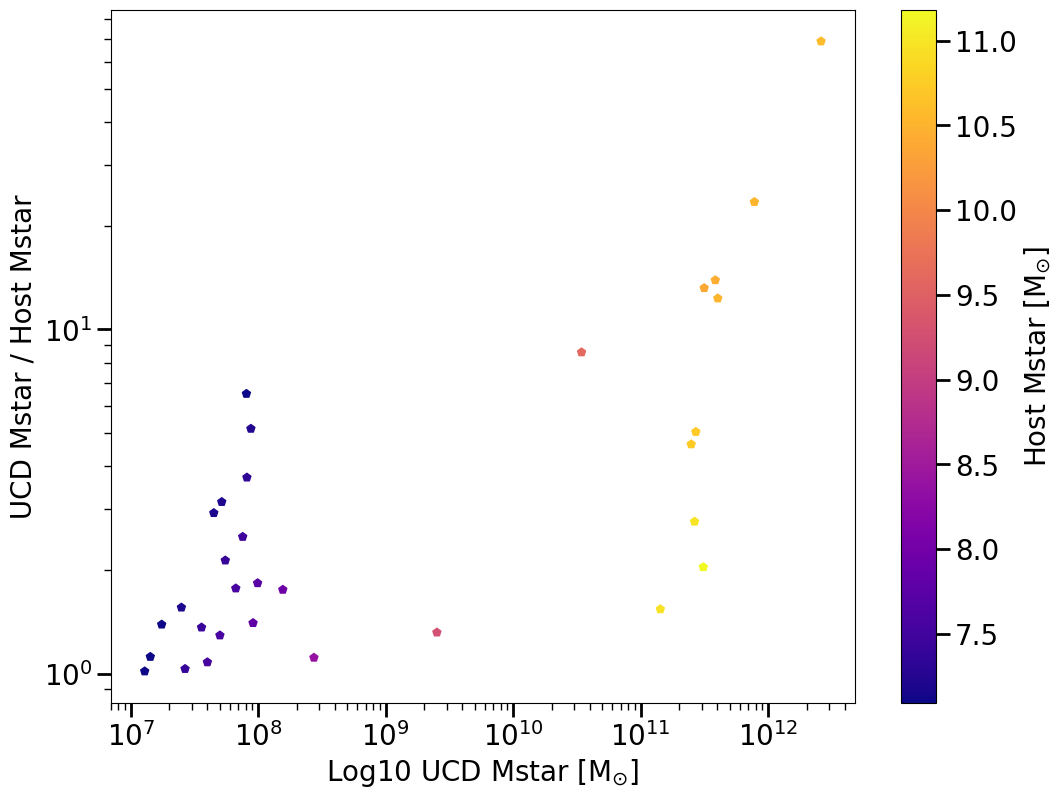

In [159]:
#bad = np.where(UCD_mass>1000000000)
x = UCD_mass/UCD_host
bad = np.where((x > 1) & (x != 1))
z=x[bad]
print(len(z))
plt.scatter(UCD_mass[bad],x[bad],c = (np.log10(UCD_host[bad])),cmap = 'plasma',marker='p')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='Host Mstar [M$_{\odot}$]')
plt.ylabel(' UCD Mstar / Host Mstar ')
plt.xlabel('Log10 UCD Mstar [M$_{\odot}$]')
j=0
bad_id = []

print('       Mass              Host Mass         Mass Difference          Ratio            ID     \n')

for i in range(len(UCD_mass)):
    if UCD_mass[i]>UCD_host[i]:
        print(UCD_mass[i],',',UCD_host[i],',',UCD_mass[i]-UCD_host[i],',',z[j],',',UCD_id[i])
        bad_id.append(UCD_id[i])
        j +=1

227
       Mass             Host Mass              Ratio              ID     

4308170.423165099 , 1584160066.332248 , 0.002719529746220443 , 568941788
703049969.9224603 , 4966157236.666362 , 0.14156820584166552 , 569017643
1417251.8130111988 , 305316971.8591007 , 0.004641903148657061 , 568952546
44587221.76348324 , 1009578484.2308214 , 0.044164195711295685 , 569013229
1645011224.0646837 , 5224697352.978431 , 0.3148529212178991 , 569090566
2936546.414008261 , 499949496.7168348 , 0.005873686108882083 , 568964828
64362025.50369523 , 628873558.9066015 , 0.10234493817103557 , 569228685
150501922.63872665 , 1913915024.6179805 , 0.07863563465612429 , 569195566
7422545.015949324 , 927127066.8426355 , 0.008005963024277855 , 568946295
24106090.08760425 , 426981719.0325714 , 0.05645696059827182 , 569120979
1632783.0828107093 , 29961530.35051202 , 0.054495984140636736 , 568940663
231639830.1728629 , 1244776627.3270473 , 0.18608947588473865 , 569258137
176331151.51901984 , 4228431038.4425673 , 0.0

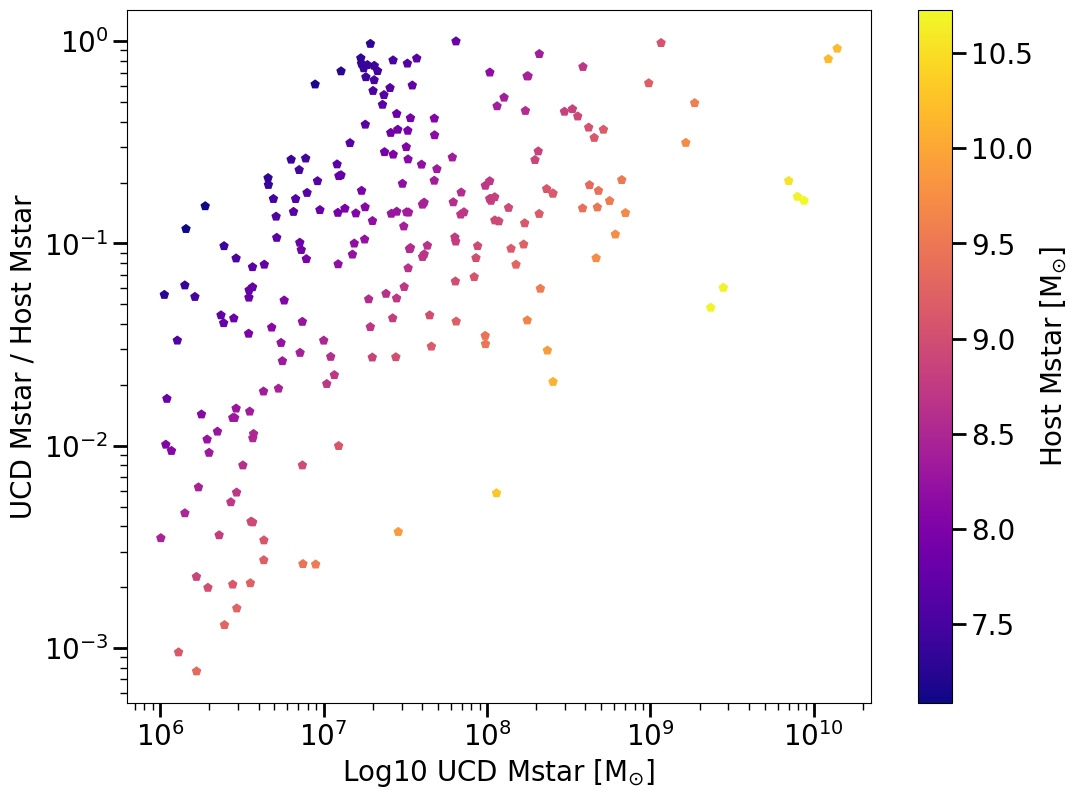

In [44]:
#bad = np.where(UCD_mass>1000000000)
x = UCD_mass/UCD_host
bad = np.where(x <1)
z=x[bad]
print(len(z))
plt.scatter(UCD_mass[bad],x[bad],c = (np.log10(UCD_host[bad])),cmap = 'plasma',marker='p')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='Host Mstar [M$_{\odot}$]')
plt.ylabel(' UCD Mstar / Host Mstar ')
plt.xlabel('Log10 UCD Mstar [M$_{\odot}$]')
j=0
print('       Mass             Host Mass              Ratio              ID     \n')
for i in range(len(UCD_mass)):
    if UCD_mass[i]<UCD_host[i]:
        print(UCD_mass[i],',',UCD_host[i],',',z[j],',',UCD_id[i])
        j +=1

In [193]:
i = 147
z = original_host_mass_at(rj[i],host[i],step[i])  
UCD_mass[i]/z

0.9222306378684735

In [187]:
f = open('UCD_Hernquist.pkl','rb')
data = pck.load(f)
f.close()

rj = data['rj']
host = data['host']
step = data['step']
bhid = data['ids']
host_at = []
x = [50,78,100,111,118,119,126,144,167,182,190,191,194,204,221,232,241,242,290,295,296,299]
right = []

for i in range(len(rj)):
    if i in x:
        #print(i,',',bhid[i])
        if bhid[i] not in bad_id:
            print(i,',',bhid[i])
            bad_id.append(bhid[i])
        continue
    host_at.append(original_host_mass_at(rj[i],host[i],step[i]))    
    right.append(i)


In [232]:
f = open('UCD_Hernquist.pkl','rb')
data = pck.load(f)
f.close()
f = open('Hernquist_bad_ids.pkl','rb')
data1 = pck.load(f)
f.close()
ids = np.array(data['ids'])
bad_ids = np.array(data1['ids'])
x = []
for i in range(len(ids)):
    if ids[i] not in bad_ids:
        x.append(i)
print(len(x),x)
y = np.where(ids == 569019624)
print(np.array(data['mass'])[y])

256 [0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 116, 117, 120, 121, 124, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 168, 169, 170, 171, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 192, 193, 195, 196, 198, 200, 201, 202, 203, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 238, 239, 240, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,

In [252]:
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()
ids=np.array(data['bhid'])
index=np.array(data['index'])
a=np.array(data['a'])
b=np.array(data['b'])
step=np.array(data['step'])
host=np.array(data['host'])

f = open('Hernquist_bad_ids.pkl','rb')
data1 = pck.load(f)
f.close()
bad_ids = data1['ids']
      
f = open('UCDs_Hernquist.pkl','rb')
data2 = pck.load(f)
f.close()

UCD_mass=np.array(data2['mass'])
UCD_ids = np.array(data2['ids'])
bad = np.where(UCD_mass>10000000000)
extra_bad = UCD_ids[bad]
print(len(extra_bad))
print(len(bad_ids))
bad_ids.extend(extra_bad)
print(len(bad_ids))
bad_ids = np.array(bad_ids)

x = []
for i in range(len(ids)):
    if ids[i] not in bad_ids:
        x.append(i)
    
x = np.array(x)
print(len(x))
x = np.where(x>-1)[0]
print(len(x))
ids= ids[x]
index= index[x]
a= a[x]
b= b[x]
step= step[x]
host= host[x]

rj=[]
t=[]
m=[]
infal=[]
bh_m=[]
host_at = []

for i in range(len(index)):
    r_j,time,mass,bh_mass,infall = tidal_history(a[i],b[i],ids[i],index[i],step[i],host[i])
    if (mass[-1]>10000000000):
        print('Error Mass',ids[i])
    
    host_at.append(halo.calculate('at('+str(1.4)+',star_mass_profile)'))
    rj.append(r_j)
    t.append(time)
    m.append(mass)
    infal.append(infall)
    bh_m.append(bh_mass)
    print(index[i])

data_to_file={'rj':rj,'time':t,'mass':m,'bh_mass':bh_m,'infall':infal,'host_at':host_at}
f = open('Hernquist_Disruption_Outputs_bad_removed.pkl','wb')
pck.dump(data_to_file,f)
f.close()

13
45
58
377
377
0
1
2
3
4
5
6
7
9
10
12
13
14
15
Error Mass 569013861
16
17
21
22
24


/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_nekw, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)


25
Error Mass 569019624


NoResultsError: Calculation at(66.94125023558713,star_mass_profile) returned no results

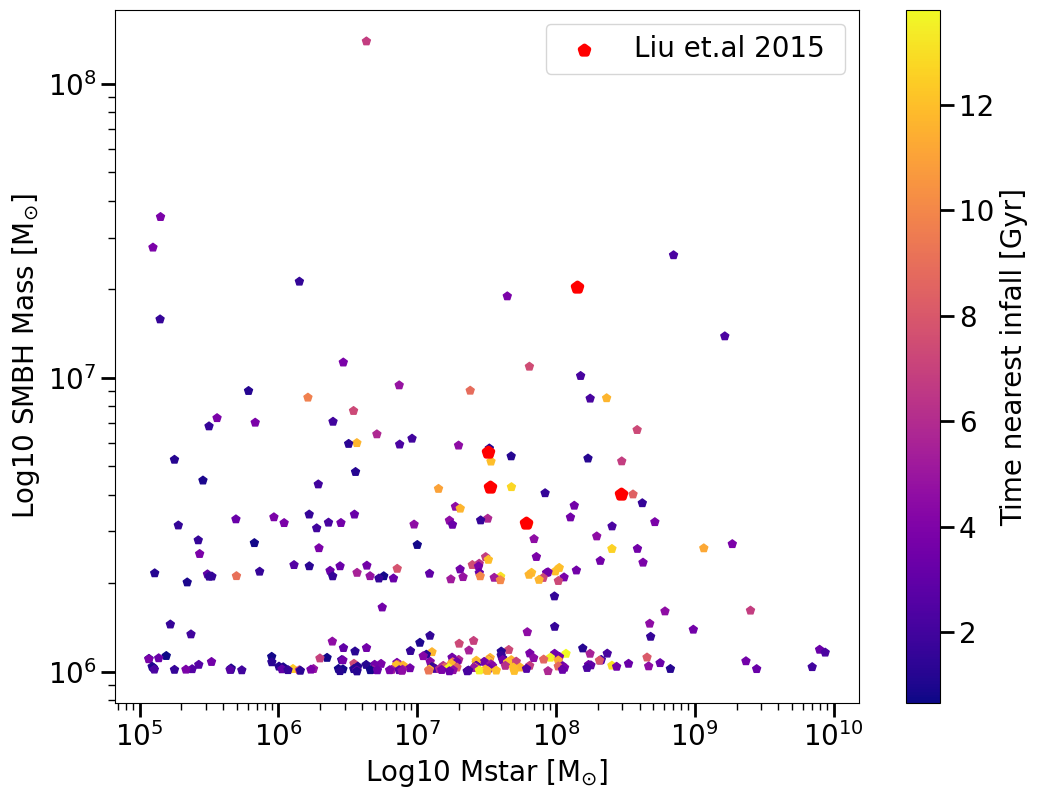

In [254]:
f = open('UCD_Hernquist.pkl','rb')
data = pck.load(f)
f.close()

UCD_bh_mass = np.array(data['bh_mass'])
UCD_mass=np.array(data['mass'])
UCD_host_mass = np.array(data['host_mass'])
UCD_dist = np.array(data['dist'])
UCD_infall = np.array(data['infall'])
UCD_proxy = np.array(data['proxy'])
UCD_ids = np.array(data['ids'])
UCD_index = np.array(data['index'])
bad = np.where(UCD_mass<10000000000)

#plt.scatter(UCD_mass,UCD_bh_mass,c = (UCD_infall),cmap = 'plasma',marker='o')
#plt.scatter(UCD_proxy,UCD_bh_mass,c = (UCD_infall),cmap = 'binary',marker='p')
plt.scatter(UCD_mass[bad],UCD_bh_mass[bad],c = (UCD_infall[bad]),cmap = 'plasma',marker='p')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='Time nearest infall [Gyr]')
plt.ylabel('Log10 SMBH Mass [M$_{\odot}$]')
plt.xlabel('Log10 Mstar [M$_{\odot}$]')
x = [142771855.50051567, 292886385.26811767, 60638233.54077626,32337005.82649589, 33618003.856203355]#, 19982490.252430223]
y = [20344817.370523263, 4038716.314133705, 3200198.552519341, 5572758.119793392, 4258338.690282161]#, 47989.085148563696]
plt.scatter(x,y,c='r',label='Liu et.al 2015 ',marker='p',linewidths=4)
plt.legend(loc='upper right')

/tmp/ipykernel_735760/3575878976.py:3: RuntimeWarning: divide by zero encountered in divide
  x = (mass/host_at)


[569013861 569019624 569680104 569684299 568960619 569605349 569125755
 569250087] [ 10.47405031  12.37512187  31.07600131  71.33126535 224.79006971
  47.44186991  11.22918524          inf] (array([  4,   8, 147, 156, 163, 186, 196, 251]),)
569013861
569019624
569680104
569684299
568960619
569605349
569125755
569250087
[569013861, 569019624, 569088464, 569619562, 568969037, 569935337, 569424843, 569055802, 569233040, 569177891, 568960772, 569382953, 569439510, 569849656, 569236695, 569366681, 569089532, 569680104, 569684299, 569378387, 574453827, 571450061, 569142541, 569037733, 569738964, 569125755, 569893834, 569401228, 568970213, 573806525, 570476065, 570224705, 569528238, 568963775, 569038017, 569681527, 569760779, 569255244, 569898688, 569470269, 571710026, 569287687, 568960619, 569605349, 569250087] 45


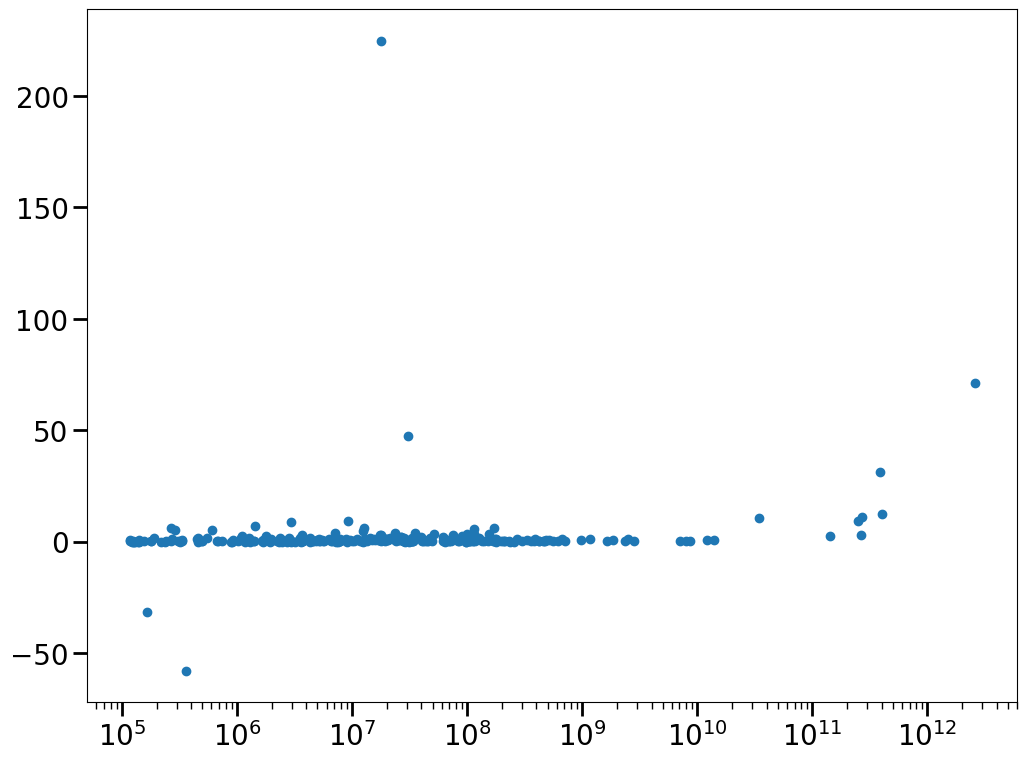

In [201]:
mass = UCD_mass[right]
ids = bhid[right]
x = (mass/host_at)
plt.scatter(UCD_mass[right],x)
plt.xscale('log')
bad = np.where(x>10)
print(ids[bad],x[bad],bad)
idd = ids[bad]
for i in range(len(idd)):
    if idd[i] not in bad_id:
        bad_id.append(idd[i])
    else: 
        print(idd[i])
print(bad_id,len(bad_id))
data_to_file = {'ids':bad_id}
f = open('Hernquist_bad_ids.pkl','wb')
pck.dump(data_to_file,f)
f.close()

In [76]:
halo = db.get_halo('h1.cosmo50/%0576/29')  
halo1= db.get_halo('h1.cosmo50/%0636/08')

host_at = []
host_at1 = []

f = open('rs_check_bad.pkl','rb')
data = pck.load(f)
f.close()
f = open('rs_check_good.pkl','rb')
data1 = pck.load(f)
f.close()

rj = np.array(data['rj'])
rj1 = np.array(data1['rj'])

for i in range(len(rj)-2):
    host_at.append(halo.calculate('at('+str(rj[i])+',star_mass_profile)'))
    print(host_at[i],',',rj[i])
for i in range(len(rj1)):
    host_at1.append(halo.calculate('at('+str(rj1[i])+',star_mass_profile)'))
    print(host_at1[i],',',rj1[i])

1095035236.9182692 , 4.988314758372872
1477034244.8036015 , 9.96090487155564
1667046242.0395894 , 19.249894345141097
1758168638.1121378 , 27.19893719831983
1828835893.3779986 , 33.777570215516455
519054.34191288176 , 0.06379016822491428
1603943.8730839847 , 0.12758025284991234
6344132.787902722 , 0.2551601391882358
16077363.506152034 , 0.38273885844798866
30643065.72562279 , 0.5103118919553666
141684391.14254922 , 1.0181926936063113
296471004.01324505 , 1.5163627408822806


Text(0, 0.5, 'UCD Mstar / Host Mstar')

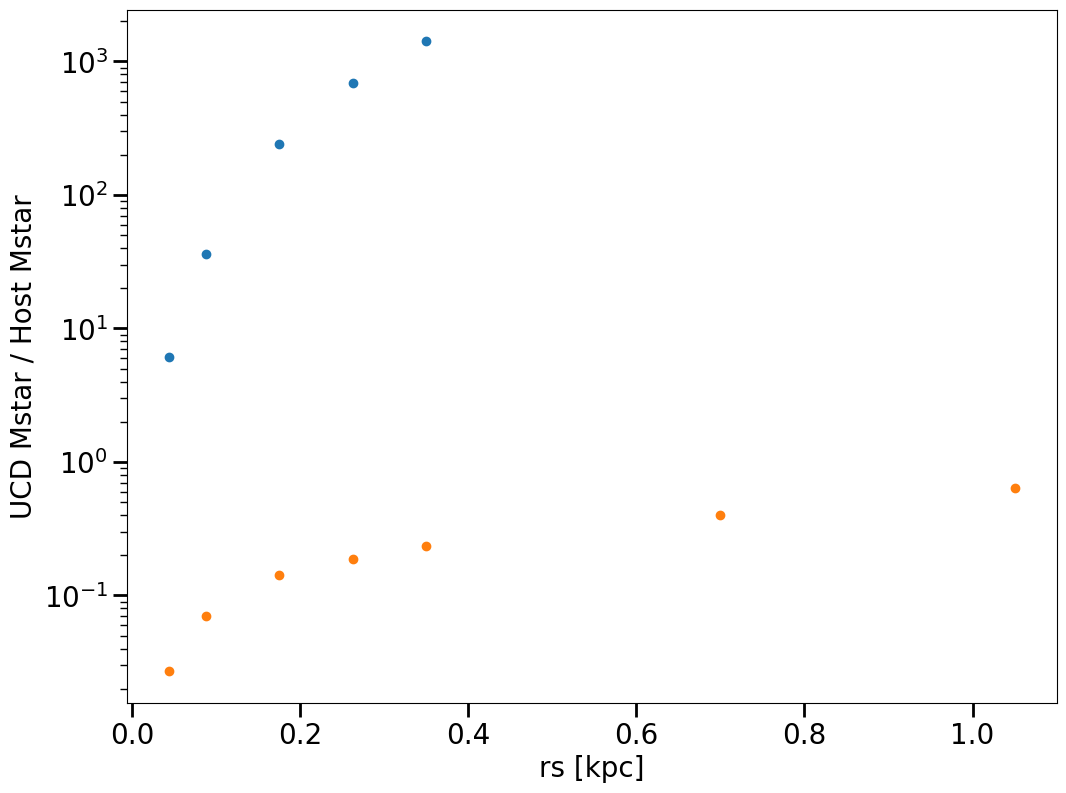

In [81]:
f = open('rs_check_bad.pkl','rb')
data = pck.load(f)
f.close()

UCD_mass=np.array(data['mass'])

f = open('rs_check_good.pkl','rb')
data1 = pck.load(f)
f.close()

UCD_mass1=np.array(data1['mass'])

x = 0.35
rs = [x*0.125,x*0.25,x*0.5,x*0.75,x,x*2,x*3]

plt.scatter(rs[0:5],UCD_mass[0:5]/host_at)
plt.scatter(rs,UCD_mass1/host_at1)
plt.yscale('log')
plt.xlabel('rs [kpc]')
plt.ylabel('UCD Mstar / Host Mstar')

In [47]:
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()
ids=np.array(data['bhid'])
i = np.where(ids==569163168)
i = int(i[0])
print(data['host'][i])

h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000576/halo_29


In [69]:
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()
ids=np.array(data['bhid'])
i = np.where(ids==569684299)
i = int(i[0])
print(data['host'][i])

h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.000636/halo_8


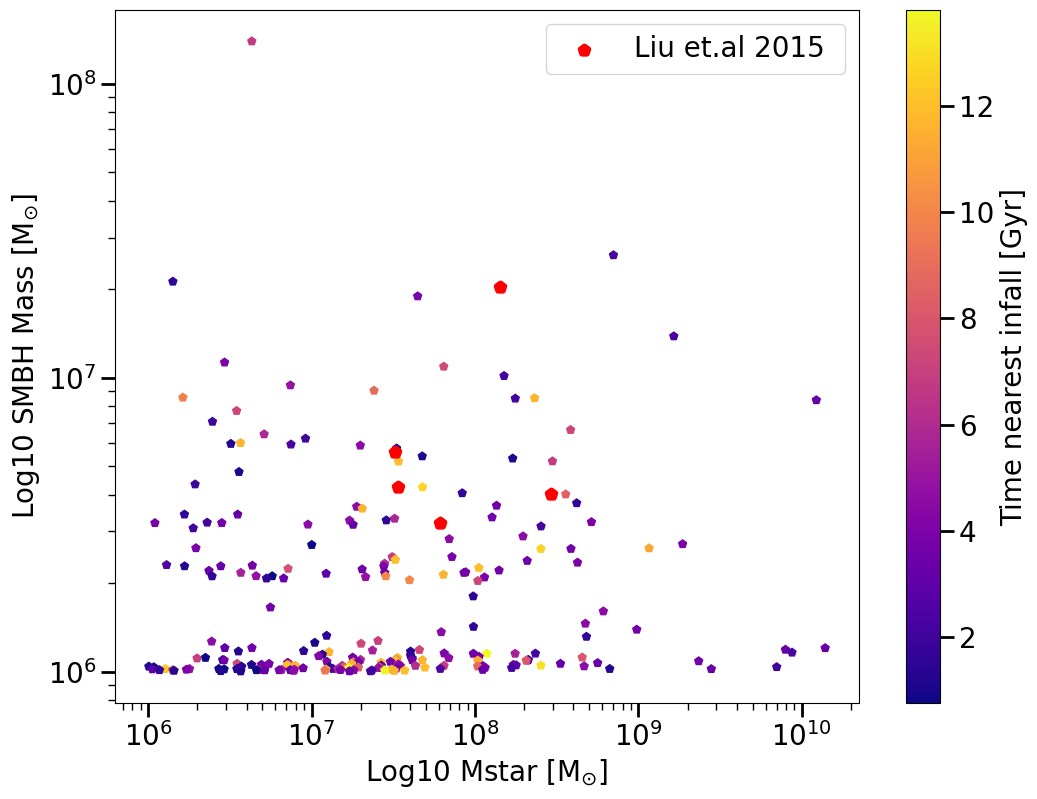

In [3]:
x = np.where(UCD_mass<UCD_host)
plt.scatter(UCD_mass[x],UCD_bh_mass[x],c = (UCD_infall[x]),cmap = 'plasma',marker='p')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label='Time nearest infall [Gyr]')
plt.ylabel('Log10 SMBH Mass [M$_{\odot}$]')
plt.xlabel('Log10 Mstar [M$_{\odot}$]')
x = [142771855.50051567, 292886385.26811767, 60638233.54077626,32337005.82649589, 33618003.856203355]#, 19982490.252430223]
y = [20344817.370523263, 4038716.314133705, 3200198.552519341, 5572758.119793392, 4258338.690282161]#, 47989.085148563696]
plt.scatter(x,y,c='r',label='Liu et.al 2015 ',marker='p',linewidths=4)
plt.legend(loc='upper right')

In [5]:
print(2193-(1378+13+254+5+10))
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()
ids=data['bhid']
print(len(ids))

533
424


In [31]:
e = 0.35
rs = [0.125*e,0.25*e,0.5*e,0.75*e,e,2*e]
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()
ids=data['bhid']
index=data['index']
a=data['a']
b=data['b']
step=data['step']
host=data['host']

for j in range(len(rs)):
    
    f = open('Extrapolation_Outputs.pkl','rb')
    data = pck.load(f)
    f.close()  
    ids=data['bhid']
    index=data['index']
    a=data['a']
    b=data['b']
    step=data['step']
    host=data['host']
    
    rj=[]
    t=[]
    m=[]
    infal=[]
    bh_m=[]
    host_at = []
    
    for i in range(len(index)):
        r_j,time,mass,bh_mass,infall = tidal_history(a[i],b[i],ids[i],index[i],step[i],host[i],rs=rs[j])
        rj.append(r_j)
        t.append(time)
        m.append(mass)
        infal.append(infall)
        bh_m.append(bh_mass)
        host_at.append(original_host_mass_at(1.4,host[i],step[i]))
        
    data_to_file={'rj':rj,'time':t,'mass':m,'bh_mass':bh_m,'infall':infal}
    f = open('check'+str(rs[j])+'.pkl','wb')
    pck.dump(data_to_file,f)
    f.close()
    
    f = open('check'+str(rs[j])+'.pkl','rb')
    data1 = pck.load(f)
    f.close()

    time = data1['time']
    mass = data1['mass']
    bh_mass=data1['bh_mass']
    infall = np.array(data1['infall'])

    f = open('Extrapolation_Outputs.pkl','rb')
    old_data = pck.load(f)
    f.close()

    ids = np.array(old_data['bhid'])
    dist = np.array(old_data['dist'])
    host_mass = np.array(old_data['hostmass'])
    index=np.array(old_data['index'])
    a=np.array(old_data['a'])
    b=np.array(old_data['b'])
    step=np.array(old_data['step'])
    host=np.array(old_data['host'])

    f = open('UCD_proxy.pkl','rb')
    vold_data = pck.load(f)
    f.close()

    UCD_proxy = np.array(vold_data['mass'])

    UCD_index = []
    UCD_bh_mass = []
    UCD_mass=[]
    other_index=[]

    for i in range(len(time)):
        if mass[i][-1]>10000:
            other_index.append(index[i]) 
            UCD_index.append(i)
    print(len(mass))
    print(len(UCD_index))
    for i in range(len(other_index)):
        UCD_mass.append(mass[UCD_index[i]][-1])
        UCD_bh_mass.append(bh_mass[UCD_index[i]][-1])
    
    UCD_host_mass = host_mass[UCD_index]
    UCD_dist = dist[UCD_index]
    infall = infall[UCD_index]
    UCD_proxy = UCD_proxy[UCD_index]
    UCD_ids = ids[UCD_index]
    UCD_a = a[UCD_index]
    UCD_b = b[UCD_index]
    UCD_step = step[UCD_index]
    UCD_host = host[UCD_index]
    host_at = np.array(host_at)
    Host_at = host_at[UCD_index]

    data_to_file={'host_at':Host_at,'a':UCD_a,'b':UCD_b,'step':UCD_step,'host':UCD_host,'ids':UCD_ids,'index':other_index,'bh_mass':UCD_bh_mass,'mass':UCD_mass,'host_mass':UCD_host_mass,'dist':UCD_dist,'infall':infall,'proxy':UCD_proxy}
    f = open('UCD_rs'+str(j)+'.pkl','wb')
    pck.dump(data_to_file,f)
    f.close()
    
    print(j)

/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_fmnf, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_twul, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_wgmu, and will be replaced in the strin

424
205
0


/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_djit, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_jwgn, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_nmjk, and will be replaced in the strin

424
265
1


/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_ofoi, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_mpvi, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_vyfk, and will be replaced in the strin

424
305
2


/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_vpvc, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_bswc, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_htks, and will be replaced in the strin

424
328
3


/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_zbff, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_mrix, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_kfjw, and will be replaced in the strin

424
337
4


/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_rtwh, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_gksx, and will be replaced in the string-lookup table.
  return type(class_name,class_base,class_attrs)
/home/msupernak/miniconda3/lib/python3.10/site-packages/tangos/relation_finding/multi_hop.py:387: SAWarning: This declarative base already contains a class with the same class name and module name as tangos.relation_finding.multi_hop.MultiHopHaloLink_qoar, and will be replaced in the strin

424
352
5
